In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
data = pd.read_csv("data\cookie_cats.csv")

In [54]:
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [55]:
data.shape

(90189, 5)

In [56]:
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


Text(0, 0.5, 'No of Users')

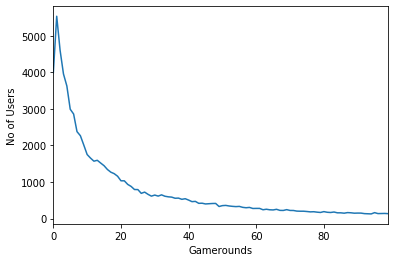

In [57]:
gamerounds = data.groupby(by='sum_gamerounds')['userid'].count()
ax = gamerounds.head(100).plot(kind='line', x='sum_gamerounds', y='userid')
ax.set_xlabel('Gamerounds')
ax.set_ylabel('No of Users')

In [58]:
x = data['retention_1'].sum()/data['retention_1'].count()
x = round(x*100,2)
print("One day retention percentage is {} %".format(x))

One day retention percentage is 44.52 %


In [59]:
data.groupby('version')['retention_1'].sum() / data.groupby('version')['retention_1'].count()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

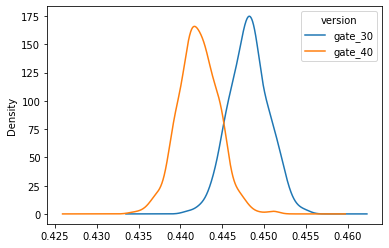

In [60]:
boot=[]
iterations=500
for i in range(iterations):
    boot_mean = data.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot.append(boot_mean)
boot = pd.DataFrame(boot)
boot.plot(kind='kde')
    

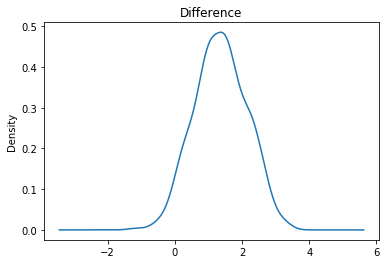

In [61]:
boot['diff']=((boot['gate_30']-boot['gate_40'])/boot['gate_40'])*100
boot['diff'].plot(kind='kde', title='Difference')

In [62]:
prob = (boot['diff']>0).sum()/len(boot['diff']>0)
prob

0.966

In [63]:
y = data['retention_7'].sum()/data['retention_7'].count()
y = round(y*100,2)
print("Seven day retention percentage is {} %".format(y))

Seven day retention percentage is 18.61 %


In [64]:
data.groupby('version')['retention_7'].sum() / data.groupby('version')['retention_7'].count()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

'84.0%'

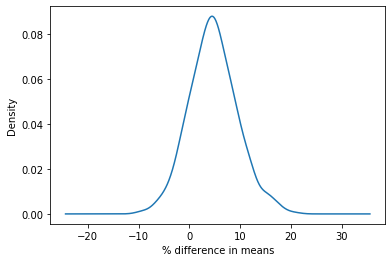

In [69]:
boot_7d = []
for i in range(500):
    boot_mean = data.sample(frac=0.1, replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)    
boot_7d = pd.DataFrame(boot_7d)
boot_7d['diff'] = (boot_7d['gate_30']-boot_7d['gate_40'])/(boot_7d['gate_40'])*100
ax = boot_7d['diff'].plot.kde()
ax.set_xlabel("% difference in means")
prob = (boot_7d['diff'] > 0).sum()/len(boot_7d['diff'] > 0)
('{:.1%}').format(prob)